In [41]:
from datetime import datetime

from matplotlib import pyplot as plt

import ddqn_class

def benchmark(num_runs = 3, random_seeds = (0, 100, 1000), env_name='CartPole-v1', **kwargs):
    assert len(random_seeds) == num_runs
    runs = []
    for idx in range(num_runs):  
        np.random.seed(random_seeds[idx])
        start = datetime.now()
        ddqn = ddqn_class.DoubleDQN(env_name, render_every=0, **kwargs)
        print(f'{start}')
        ddqn.run()
        end = datetime.now()
        data = {'instance': ddqn, 'total_time': (end-start).total_seconds()}
        runs.append(data)
        print(f'\nRun {idx} total time: {(end-start).total_seconds()/60:.2f} mins')        
    return runs

def print_benchmark(data):
    for run in data:
        ddqn = run['instance']
        time = run['total_time']
        for key, val in ddqn.__dict__.items():
            if isinstance(val, list):
                continue
            print(f'{key}: {val}')

        print(f'\nTotal training time: {time/60:.2f} minutes')
        print('---')    
        


In [29]:
data = benchmark()
print_benchmark(data)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Run 0 total time: 15.54 mins reward: 317.0, 10-episode mean reward: 493.5 
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Run 1 total time: 13.02 mins reward: 500.0, 10-episode mean reward: 395.1 
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Run 2 total time: 9.98 mins, reward: 500.0, 10-episode mean reward: 450.7 
env_name: CartPole-v1
memory_size: 100000
batch_size: 64
save_every: 500
render_every: 0
num_episodes: 1000
update_target_every: 100
report_every: 10
max_episode_len: 700
discount_rate: 0.99
epsilon_max: 1.0
epsilon_min: 0.01
annealing_const: 0.001
data_directory: data
memory: Memory(size=100000, batch_size=64)
steps: 382288
env: <TimeLimit<CartPoleEnv<CartPole-v1>>>
state_shape: (4,)
action_shape: 2
online_net: <keras.models.Sequential object at 0x11f6c1828>
target_net: <k

In [53]:
%matplotlib inline



def plot_episode_rewards(data, hline_at=200):
    plt.figure(figsize=(20, 10))
    for idx, ddqn in enumerate([run['instance'] for run in data]):    
        plt.plot(smooth(np.array(ddqn.episode_rewards), window_len=11), alpha=0.7)
        # plt.plot(ddqn.episode_rewards, alpha=0.7)
    plt.legend(['1', '2', '3'])
    plt.hlines(hline_at, 0, len(ddqn.episode_rewards), linestyles='dotted', )

In [57]:
def plot_q_vals(data, hline_at=100):
    plt.figure(figsize=(20, 10))
    for idx, ddqn in enumerate([run['instance'] for run in data]):    
        # plt.plot(ddqn.online_q_history, alpha=0.7)
        plt.plot(ddqn.target_q_history, alpha=0.7)
    plt.hlines(hline_at, 0, len(ddqn.target_q_history), linestyles='dotted', )
    plt.legend(['1', '2', '3'])


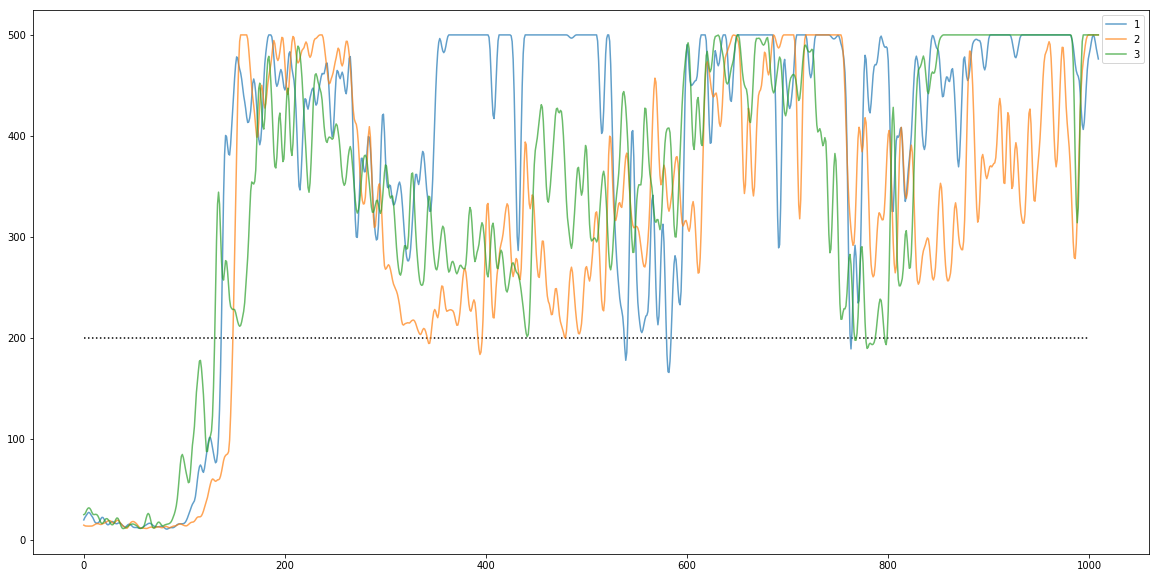

In [31]:
plot_episode_rewards(data)

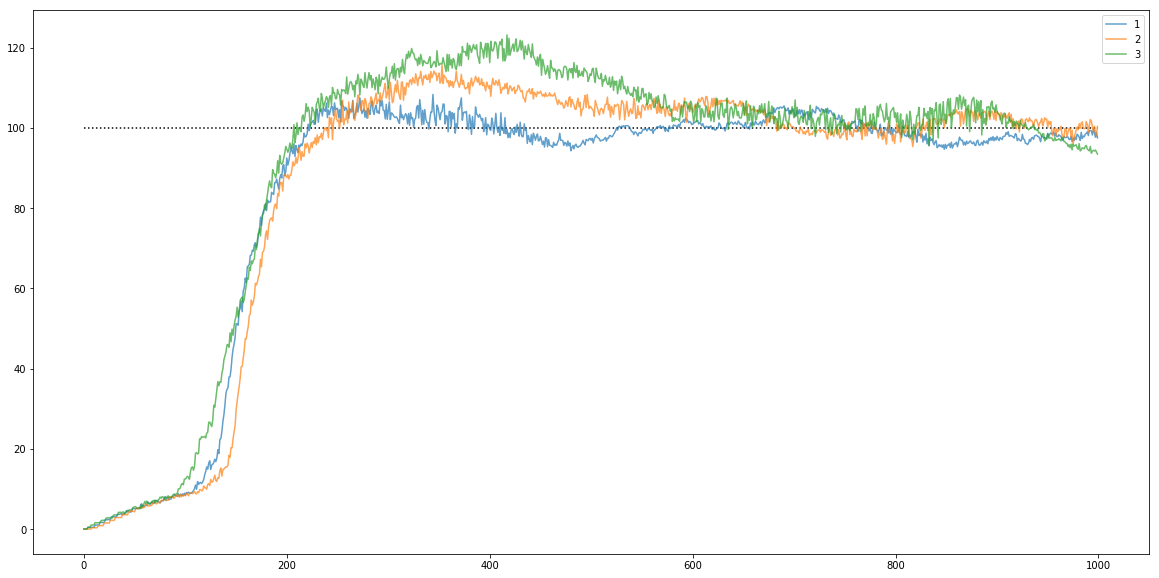

In [32]:
plot_q_vals(data)

In [34]:
benchmark2 = benchmark(num_episodes=3000, update_target_every=300)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Run 0 total time: 31.10 mins2, reward: 500.0, 10-episode mean reward: 376.0, 100-episode mean reward: 414.54 
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Run 1 total time: 17.71 mins, reward: 500.0, 10-episode mean reward: 412.5, 100-episode mean reward: 404.47 
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Run 2 total time: 27.42 mins, reward: 472.0, 10-episode mean reward: 411.5, 100-episode mean reward: 442.62 


In [24]:
print_benchmark(benchmark2)

env_name: CartPole-v1
memory_size: 100000
batch_size: 64
save_every: 500
render_every: 0
num_episodes: 1500
update_target_every: 300
report_every: 10
max_episode_len: 700
discount_rate: 0.99
epsilon_max: 1.0
epsilon_min: 0.01
annealing_const: 0.001
data_directory: data
memory: Memory(size=100000, batch_size=64)
steps: 336474
env: <TimeLimit<CartPoleEnv<CartPole-v1>>>
state_shape: (4,)
action_shape: 2
online_net: <keras.models.Sequential object at 0x115246c18>
target_net: <keras.models.Sequential object at 0x115358710>
save_dir: data/2018-05-11__12--30--22
data_file_name: CartPole-v12018-05-11__12--30--22history.data

Total training time: 12.16 minutes
---
env_name: CartPole-v1
memory_size: 100000
batch_size: 64
save_every: 500
render_every: 0
num_episodes: 1500
update_target_every: 300
report_every: 10
max_episode_len: 700
discount_rate: 0.99
epsilon_max: 1.0
epsilon_min: 0.01
annealing_const: 0.001
data_directory: data
memory: Memory(size=100000, batch_size=64)
steps: 122313
env: <Tim

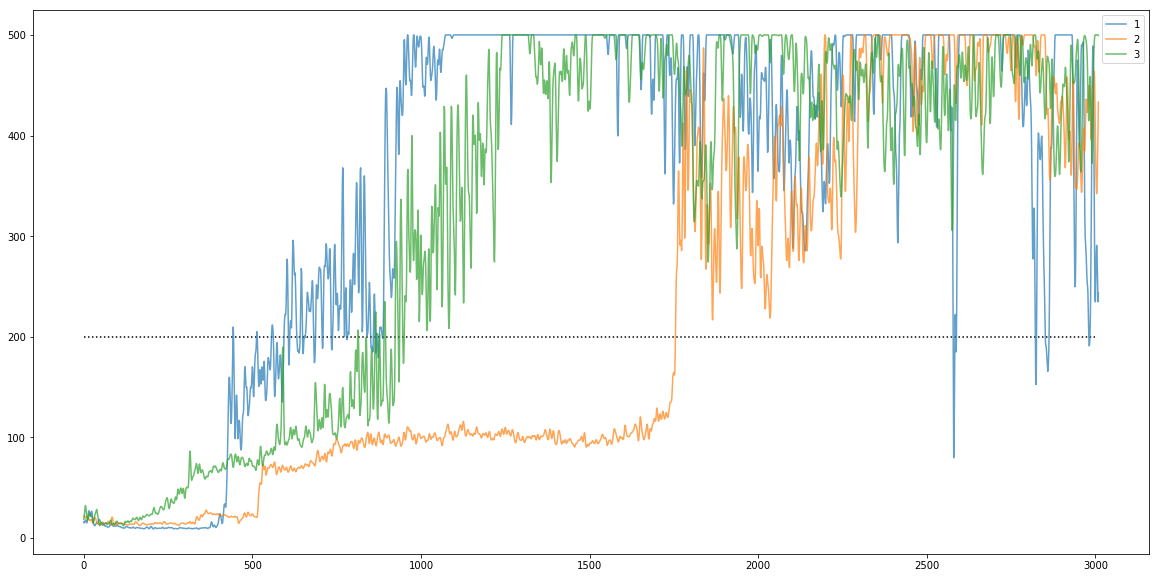

In [35]:
from smooth import smooth
plot_episode_rewards(benchmark2)

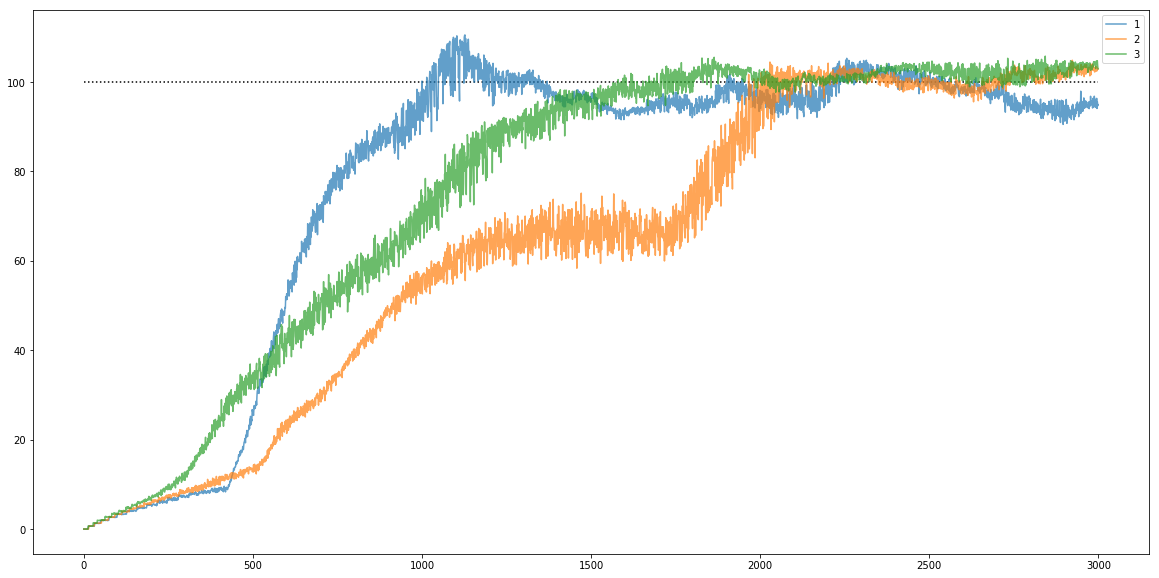

In [36]:
plot_q_vals(benchmark2)

In [42]:
benchmark(env_name='LunarLander-v2', num_episodes=1500)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
2018-05-11 18:20:18.077963
Episode: 1490, steps: 987331, reward: -79.53802007950861, 10-episode mean reward: -47.50348020615685, 100-episode mean reward: -58.52815394092892   
Run 0 total time: 52.91 mins
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
2018-05-11 19:13:12.508289
Episode: 1490, steps: 911725, reward: 219.20198095078337, 10-episode mean reward: 149.4059780124344, 100-episode mean reward: 145.82349010708188   7 
Run 1 total time: 46.38 mins
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
2018-05-11 19:59:35.560453
Episode: 1490, steps: 953401, reward: 129.7238825660487, 10-episode mean reward: 159.83788712988766, 100-episode mean reward: 109.14099170123771    
Run 2 total time: 53.65 mins


[{'instance': DoubleDQN(env_name='LunarLander-v2', memory_size=100000, batch_size=64, save_every=500, render_every=0, num_episodes=1500, update_target_every=100, report_every=10, max_episode_len=700, discount_rate=0.99, epsilon_max=1.0, epsilon_min=0.01, annealing_const=0.001, data_directory='data'),
  'total_time': 3174.430221},
 {'instance': DoubleDQN(env_name='LunarLander-v2', memory_size=100000, batch_size=64, save_every=500, render_every=0, num_episodes=1500, update_target_every=100, report_every=10, max_episode_len=700, discount_rate=0.99, epsilon_max=1.0, epsilon_min=0.01, annealing_const=0.001, data_directory='data'),
  'total_time': 2783.051933},
 {'instance': DoubleDQN(env_name='LunarLander-v2', memory_size=100000, batch_size=64, save_every=500, render_every=0, num_episodes=1500, update_target_every=100, report_every=10, max_episode_len=700, discount_rate=0.99, epsilon_max=1.0, epsilon_min=0.01, annealing_const=0.001, data_directory='data'),
  'total_time': 3219.107621}]

In [43]:
lunar_benchmark1 = _

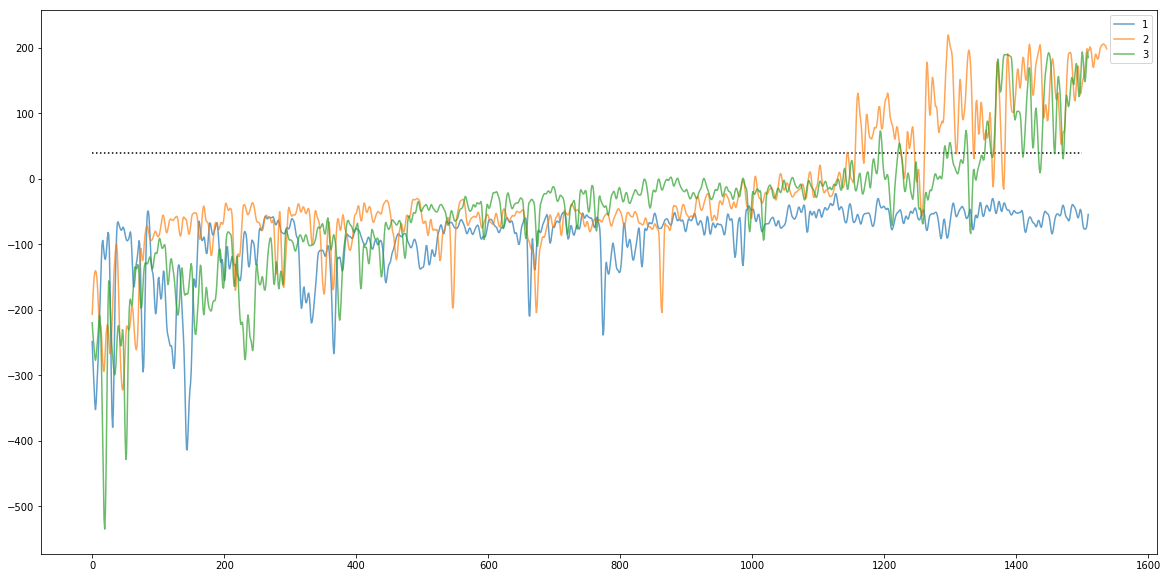

In [56]:
plot_episode_rewards(lunar_benchmark1, hline_at=40)

In [72]:


def plot_timeseries(data, hline_at=100):
    plt.figure(figsize=(20, 10))
    for series in data:
        plt.plot(series, alpha=0.7)
    plt.hlines(hline_at, 0, len(series), linestyles='dotted', )
    plt.legend(list(range(0, len(data))))


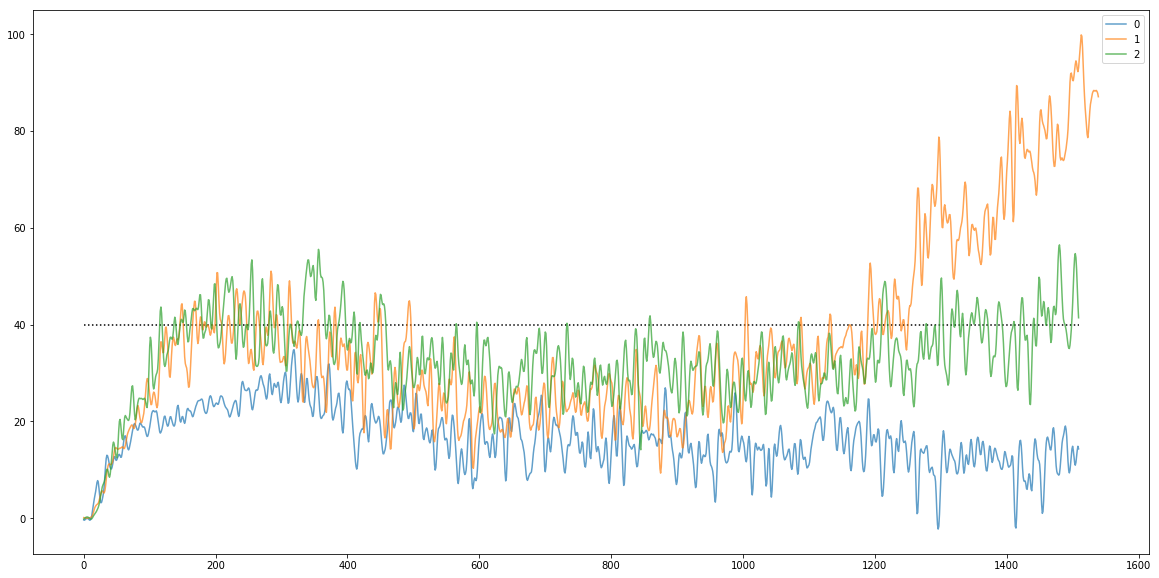

In [73]:
q_vals = [run['instance'].target_q_history for run in lunar_benchmark1]
smoothed_q_vals = [smooth(np.array(data)) for data in q_vals]
plot_timeseries(smoothed_q_vals, hline_at=40)

In [83]:
for record in data:
    ddqn = record['instance']
    # ddqn._save_self()
    print(ddqn.save_dir)

data/2018-05-15__15--53--12
data/2018-05-15__15--53--13
data/2018-05-15__15--53--13
